In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2056192/2110848 [============================>.] - ETA: 0s

In [6]:
import numpy as np

In [64]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [65]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [66]:
from keras.utils.np_utils import to_categorical

In [67]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [68]:
from keras import layers
from keras import models

In [69]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [70]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [72]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s - loss: 2.1559 - acc: 0.5767 - val_loss: 1.3724 - val_acc: 0.6870
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 1.1258 - acc: 0.7554 - val_loss: 1.0993 - val_acc: 0.7610
Epoch 3/9
7982/7982 [==============================] - 2s - loss: 0.8186 - acc: 0.8200 - val_loss: 0.9700 - val_acc: 0.7930
Epoch 4/9
7982/7982 [==============================] - 2s - loss: 0.6089 - acc: 0.8701 - val_loss: 0.9496 - val_acc: 0.7910
Epoch 5/9
7982/7982 [==============================] - 2s - loss: 0.4561 - acc: 0.9022 - val_loss: 0.9037 - val_acc: 0.8140
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.3446 - acc: 0.9242 - val_loss: 0.8886 - val_acc: 0.8200
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.2738 - acc: 0.9391 - val_loss: 0.8828 - val_acc: 0.8170
Epoch 8/9
7982/7982 [==============================] - 1s - loss: 0.2192 - acc: 0.94

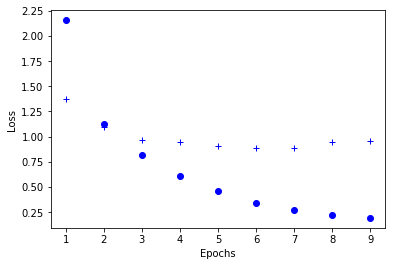

In [73]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

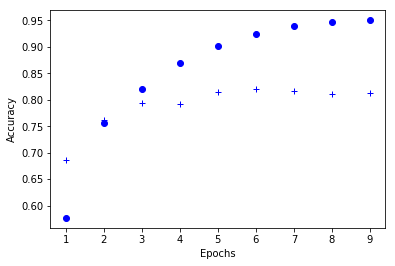

In [74]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [75]:
model.evaluate(x_test, one_hot_test_labels)

2112/2246 [===========================>..] - ETA: 0s

[1.0607315256249554, 0.78183437224381325]